## How to use — Hourly consumption (last 24h preview)

**What this cell does**
- Imports hourly consumption via `elering_consumption.get_hourly_consumption(...)` in **Europe/Tallinn**.
- Shows a **24-hour preview** (latest 24 local hours), draws a **line chart**, prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full hourly dataset** and the **24h preview**.

**Before you run**
- This notebook should be in the **same folder** as `elering_consumption.py` (or adjust `SCRIPTS_DIR` in the cell).
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default to avoid partial days (you can change it).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s (possibly partial) data.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A small table with the **last 24h**.
  - A **line chart** of hourly values.
  - Printed **shape**, **time range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_hourly_all.csv` — full hourly dataset in EE time.
- `output/elering_hourly_last24h_preview.csv` — only the last 24 local hours.

**Customize**
- Want a different window? Change `pd.Timedelta(hours=24)` in the cell.
- Need to include today? Set `EXCLUDE_TODAY=False`.
- Working with a different time zone? Change `TZ` (the module converts to EE by default; keep consistent).

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is in the same directory or adjust `sys.path`.
- *Empty preview:* there might be no rows in the last 24h — check the loaded time range printed by the cell.


,sum_cons_time,sum_el_hourly_value,imputed,weekday,is_weekend,is_holiday
0,2025-09-17 23:00:00+03:00,758.6,False,Wednesday,False,False
1,2025-09-18 00:00:00+03:00,712.1,False,Thursday,False,False
2,2025-09-18 01:00:00+03:00,681.7,False,Thursday,False,False
3,2025-09-18 02:00:00+03:00,668.8,False,Thursday,False,False
4,2025-09-18 03:00:00+03:00,676.0,False,Thursday,False,False
5,2025-09-18 04:00:00+03:00,678.7,False,Thursday,False,False
6,2025-09-18 05:00:00+03:00,690.0,False,Thursday,False,False
7,2025-09-18 06:00:00+03:00,771.4,False,Thursday,False,False
8,2025-09-18 07:00:00+03:00,883.8,False,Thursday,False,False
9,2025-09-18 08:00:00+03:00,999.8,False,Thursday,False,False


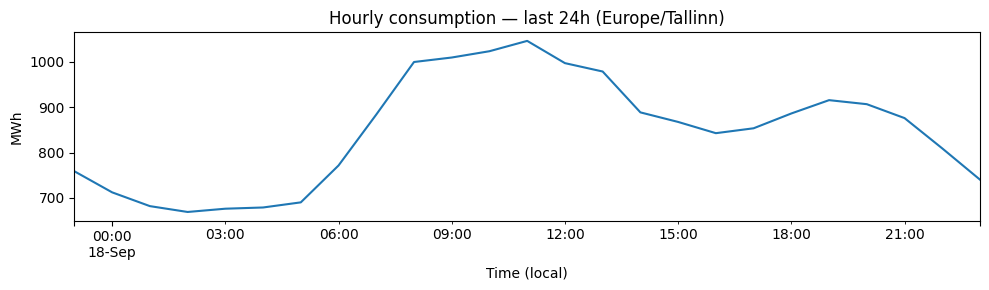

=== HOURLY: shape === (17543, 6)
=== HOURLY: time range === 2023-09-19 00:00:00+03:00 → 2025-09-18 23:00:00+03:00

=== HOURLY: dtypes ===
sum_cons_time          datetime64[ns, Europe/Tallinn]
sum_el_hourly_value                           float64
imputed                                          bool
weekday                                        object
is_weekend                                       bool
is_holiday                                       bool
dtype: object

=== HOURLY: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17543 entries, 0 to 17542
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype                         
---  ------               --------------  -----                         
 0   sum_cons_time        17543 non-null  datetime64[ns, Europe/Tallinn]
 1   sum_el_hourly_value  17543 non-null  float64                       
 2   imputed              17543 non-null  bool                          
 3   weekday              

In [25]:
# --- Hourly consumption: preview last 24h + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

from elering_consumption import get_hourly_consumption

# Load hourly data (tz-aware; Europe/Tallinn)
df_hourly = get_hourly_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing=True,
)

# Build a 24h time window using a mask (instead of .last("24H"))
idxed = df_hourly.set_index("sum_cons_time").sort_index()
if len(idxed) == 0:
    raise RuntimeError("No hourly data available to preview.")
end_ts = idxed.index.max()
start_ts = end_ts - pd.Timedelta(hours=24)
last_24h = idxed.loc[start_ts:end_ts].reset_index()   # inclusive slice on DatetimeIndex

# Preview
display(last_24h.head(24))

# Plot: last 24 hours
ax = (last_24h.set_index("sum_cons_time")["sum_el_hourly_value"]
                 .plot(figsize=(10, 3), title="Hourly consumption — last 24h (Europe/Tallinn)"))
ax.set_xlabel("Time (local)")
ax.set_ylabel("MWh")
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== HOURLY: shape ===", df_hourly.shape)
print("=== HOURLY: time range ===", df_hourly["sum_cons_time"].min(), "→", df_hourly["sum_cons_time"].max())
print("\n=== HOURLY: dtypes ===")
print(df_hourly.dtypes)
print("\n=== HOURLY: .info() ===")
df_hourly.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_hourly.to_csv(OUTDIR / "elering_hourly_all.csv", index=False)
    last_24h.to_csv(OUTDIR / "elering_hourly_last24h_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'elering_hourly_all.csv'}")
    print(f"[saved] {OUTDIR/'elering_hourly_last24h_preview.csv'}")


## How to use — Daily consumption (last 7 days preview)

**What this cell does**
- Imports **daily** consumption via `elering_consumption.get_daily_consumption(...)` on the **Europe/Tallinn** calendar.
- Shows a **7-day preview**, draws a **bar chart**, prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Notebook in the **same folder** as `elering_consumption.py`.
- Python packages: `pandas`, `matplotlib`, `holidays` (recommended).
- Today is **excluded** by default (avoids partial days).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A small table with the **last 7 days**.
  - A **bar chart** of daily totals.
  - Printed **shape**, **date range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/elering_daily_all.csv` — full daily dataset (EE calendar).
- `output/elering_daily_last7d_preview.csv` — only the last 7 days.

**Customize**
- Different preview window? Change `pd.Timedelta(days=7)` in the cell.
- Include today? Set `EXCLUDE_TODAY=False`.
- Different chart type? Replace `kind="bar"` with `line` if you prefer a line chart.

**Troubleshooting**
- *ImportError:* ensure `elering_consumption.py` is reachable.
- *Empty preview:* verify the printed date range covers the last 7 days; adjust `MONTHS` or filters if needed.


,sum_cons_date,sum_el_daily_value,weekday,is_weekend,is_holiday
0,2025-09-11,18842.0,Thursday,False,False
1,2025-09-12,20188.9,Friday,False,False
2,2025-09-13,18053.1,Saturday,True,False
3,2025-09-14,17423.6,Sunday,True,False
4,2025-09-15,20982.5,Monday,False,False
5,2025-09-16,20840.2,Tuesday,False,False
6,2025-09-17,19662.1,Wednesday,False,False
7,2025-09-18,20404.1,Thursday,False,False


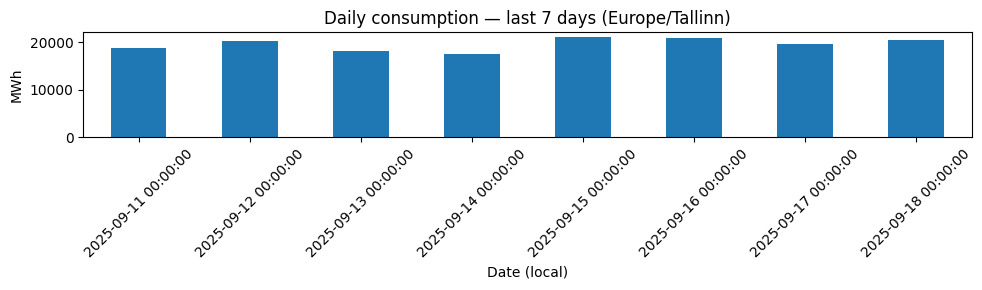

=== DAILY: shape === (731, 5)
=== DAILY: date range === 2023-09-19 00:00:00 → 2025-09-18 00:00:00

=== DAILY: dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
weekday                       object
is_weekend                      bool
is_holiday                      bool
dtype: object

=== DAILY: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   weekday             731 non-null    object        
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ KB

[saved] output\elering_daily_all.csv
[saved] output\elering_daily_last7d_previ

In [26]:
# --- Daily consumption: preview last 7 days + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

from elering_consumption import get_daily_consumption

# Load daily data (Europe/Tallinn calendar)
df_daily = get_daily_consumption(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
    add_weekday=True,
    add_holidays=True,
    impute_missing_hourly=True,
).copy()

# Ensure datetime for slicing
df_daily["sum_cons_date"] = pd.to_datetime(df_daily["sum_cons_date"])

# Build a 7-day time window using a mask (instead of .last("7D"))
idxed_d = df_daily.set_index("sum_cons_date").sort_index()
if len(idxed_d) == 0:
    raise RuntimeError("No daily data available to preview.")
end_d = idxed_d.index.max()
start_d = end_d - pd.Timedelta(days=7)
last_7d = idxed_d.loc[start_d:end_d].reset_index()   # inclusive slice

# Preview
display(last_7d)

# Plot: last 7 days (bar)
ax = (last_7d.set_index("sum_cons_date")["sum_el_daily_value"]
               .plot(kind="bar", figsize=(10, 3), title="Daily consumption — last 7 days (Europe/Tallinn)", rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("MWh")
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== DAILY: shape ===", df_daily.shape)
print("=== DAILY: date range ===", df_daily["sum_cons_date"].min(), "→", df_daily["sum_cons_date"].max())
print("\n=== DAILY: dtypes ===")
print(df_daily.dtypes)
print("\n=== DAILY: .info() ===")
df_daily.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_daily.to_csv(OUTDIR / "elering_daily_all.csv", index=False)
    last_7d.to_csv(OUTDIR / "elering_daily_last7d_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'elering_daily_all.csv'}")
    print(f"[saved] {OUTDIR/'elering_daily_last7d_preview.csv'}")


## How to use — Hourly temperature (last 24h preview)

**What this cell does**
- Imports **hourly temperature** via `meteostat_temperature.get_hourly_temperature(...)` on **Europe/Tallinn** time.
- Shows a **24-hour preview** (latest local 24h), draws a **line chart**, prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full hourly dataset** and the **24h preview**.

**Before you run**
- This notebook should be in the **same folder** as `meteostat_temperature.py` (or adjust `SCRIPTS_DIR`).
- Python packages: `pandas`, `matplotlib`, `meteostat` (already required by the script).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today’s partial data.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A table with the **last 24h** (`hour_temp_time`, `hour_temp_value` in °C).
  - A **line chart** for the last 24 hours.
  - Printed **shape**, **time range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_hourly_temp_all.csv` — full hourly temperature in EE time.
- `output/meteostat_hourly_temp_last24h_preview.csv` — only the last 24 local hours.

**Customize**
- Different preview window? Change `pd.Timedelta(hours=24)` in the cell.
- Include today? Set `EXCLUDE_TODAY=False`.
- Use custom points? `get_hourly_temperature(points=...)` supports custom Meteostat `Point`s.

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* there may be no rows in the last 24h — check the printed time range and `MONTHS`.


,hour_temp_time,hour_temp_value
0,2025-09-17 23:00:00+03:00,12.82
1,2025-09-18 00:00:00+03:00,12.78
2,2025-09-18 01:00:00+03:00,12.38
3,2025-09-18 02:00:00+03:00,12.08
4,2025-09-18 03:00:00+03:00,11.78
5,2025-09-18 04:00:00+03:00,11.86
6,2025-09-18 05:00:00+03:00,11.72
7,2025-09-18 06:00:00+03:00,11.68
8,2025-09-18 07:00:00+03:00,11.4
9,2025-09-18 08:00:00+03:00,12.22


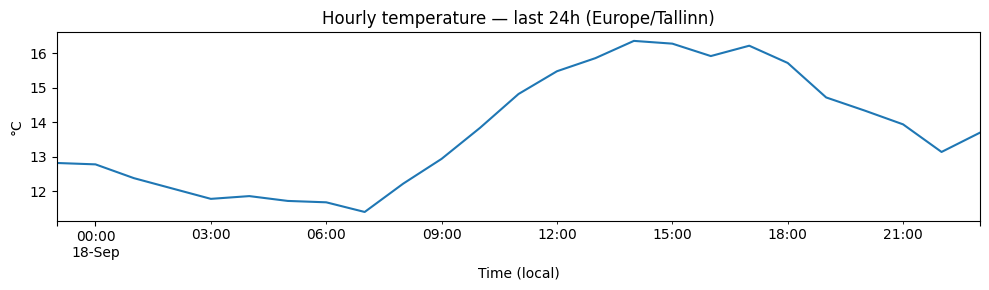

=== HOURLY TEMP: shape === (17545, 2)
=== HOURLY TEMP: time range === 2023-09-19 00:00:00+03:00 → 2025-09-18 23:00:00+03:00

=== HOURLY TEMP: dtypes ===
hour_temp_time     datetime64[ns, Europe/Tallinn]
hour_temp_value                           Float64
dtype: object

=== HOURLY TEMP: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545 entries, 0 to 17544
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype                         
---  ------           --------------  -----                         
 0   hour_temp_time   17545 non-null  datetime64[ns, Europe/Tallinn]
 1   hour_temp_value  17545 non-null  Float64                       
dtypes: Float64(1), datetime64[ns, Europe/Tallinn](1)
memory usage: 291.4 KB

[saved] output\meteostat_hourly_temp_all.csv
[saved] output\meteostat_hourly_temp_last24h_preview.csv


In [27]:
# --- Hourly temperature: preview last 24h + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_hourly_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

# Load hourly temperature (tz-aware local timestamps)
df_hourly_t = get_hourly_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
)

# Build a 24h time window via a mask (future-proof vs .last("24H"))
idxed = df_hourly_t.set_index("hour_temp_time").sort_index()
if len(idxed) == 0:
    raise RuntimeError("No hourly temperature data available to preview.")
end_ts = idxed.index.max()
start_ts = end_ts - pd.Timedelta(hours=24)
last_24h = idxed.loc[start_ts:end_ts].reset_index()

# Preview
display(last_24h.head(24))

# Plot: last 24 hours
ax = (last_24h.set_index("hour_temp_time")["hour_temp_value"]
                 .plot(figsize=(10, 3), title="Hourly temperature — last 24h (Europe/Tallinn)"))
ax.set_xlabel("Time (local)")
ax.set_ylabel("°C")
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== HOURLY TEMP: shape ===", df_hourly_t.shape)
print("=== HOURLY TEMP: time range ===",
      df_hourly_t["hour_temp_time"].min(), "→", df_hourly_t["hour_temp_time"].max())
print("\n=== HOURLY TEMP: dtypes ===")
print(df_hourly_t.dtypes)
print("\n=== HOURLY TEMP: .info() ===")
df_hourly_t.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_hourly_t.to_csv(OUTDIR / "meteostat_hourly_temp_all.csv", index=False)
    last_24h.to_csv(OUTDIR / "meteostat_hourly_temp_last24h_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'meteostat_hourly_temp_all.csv'}")
    print(f"[saved] {OUTDIR/'meteostat_hourly_temp_last24h_preview.csv'}")


## How to use — Daily temperature (last 7 days preview)

**What this cell does**
- Imports **daily average temperature** via `meteostat_temperature.get_daily_temperature(...)` on the **Europe/Tallinn** calendar.
- Shows a **7-day preview**, draws a **line (or bar) chart**, prints **dtypes** and **`.info()`**.
- Optionally saves **two CSVs** to `./output/`: the **full daily dataset** and the **7-day preview**.

**Before you run**
- Notebook in the **same folder** as `meteostat_temperature.py`.
- Python packages: `pandas`, `matplotlib`, `meteostat`.

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `EXCLUDE_TODAY`: `True` to exclude today.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.

**Run**
- Execute the cell once. You’ll see:
  - A table with the **last 7 days** (`avg_day_temp_date`, `hour_day_value` in °C).
  - A **chart** of daily averages (default: line).
  - Printed **shape**, **date range**, **dtypes**, and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/meteostat_daily_temp_all.csv` — full daily temperature dataset (EE calendar).
- `output/meteostat_daily_temp_last7d_preview.csv` — only the last 7 days.

**Customize**
- Prefer a bar chart? Replace `.plot(kind="line", ...)` with `kind="bar"`.
- Different preview window? Change `pd.Timedelta(days=7)`.
- Include today? Set `EXCLUDE_TODAY=False`.

**Troubleshooting**
- *ImportError:* ensure `meteostat_temperature.py` is reachable.
- *Empty preview:* adjust `MONTHS` or verify the printed date range covers the last 7 days.


,avg_day_temp_date,hour_day_value
0,2025-09-11,18.649167
1,2025-09-12,16.150833
2,2025-09-13,16.26
3,2025-09-14,16.139167
4,2025-09-15,15.0875
5,2025-09-16,14.975
6,2025-09-17,14.930833
7,2025-09-18,13.799167


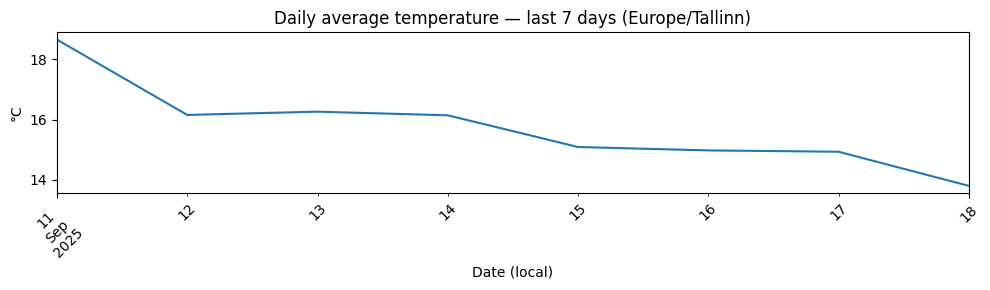

=== DAILY TEMP: shape === (731, 2)
=== DAILY TEMP: date range === 2023-09-19 00:00:00 → 2025-09-18 00:00:00

=== DAILY TEMP: dtypes ===
avg_day_temp_date    datetime64[ns]
hour_day_value              Float64
dtype: object

=== DAILY TEMP: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   avg_day_temp_date  731 non-null    datetime64[ns]
 1   hour_day_value     731 non-null    Float64       
dtypes: Float64(1), datetime64[ns](1)
memory usage: 12.3 KB

[saved] output\meteostat_daily_temp_all.csv
[saved] output\meteostat_daily_temp_last7d_preview.csv


In [28]:
# --- Daily temperature: preview last 7 days + plot + dtypes + optional CSV (no FutureWarning) ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from meteostat_temperature import get_daily_temperature
except Exception as e:
    raise ImportError(f"Could not import meteostat_temperature.py from {SCRIPTS_DIR}: {e}")

# Load daily temperature (Europe/Tallinn calendar)
df_daily_t = get_daily_temperature(
    months=MONTHS,
    tz=TZ,
    exclude_today=EXCLUDE_TODAY,
).copy()

# Ensure datetime for slicing
df_daily_t["avg_day_temp_date"] = pd.to_datetime(df_daily_t["avg_day_temp_date"])

# Build a 7-day time window via a mask (future-proof vs .last("7D"))
idxed_d = df_daily_t.set_index("avg_day_temp_date").sort_index()
if len(idxed_d) == 0:
    raise RuntimeError("No daily temperature data available to preview.")
end_d = idxed_d.index.max()
start_d = end_d - pd.Timedelta(days=7)
last_7d = idxed_d.loc[start_d:end_d].reset_index()

# Preview
display(last_7d)

# Plot: last 7 days (line). Change kind="bar" if you prefer bars.
ax = (last_7d.set_index("avg_day_temp_date")["hour_day_value"]
               .plot(kind="line", figsize=(10, 3),
                     title="Daily average temperature — last 7 days (Europe/Tallinn)", rot=45))
ax.set_xlabel("Date (local)")
ax.set_ylabel("°C")
plt.tight_layout()
plt.show()

# Data types & quick info
print("=== DAILY TEMP: shape ===", df_daily_t.shape)
print("=== DAILY TEMP: date range ===",
      df_daily_t["avg_day_temp_date"].min(), "→", df_daily_t["avg_day_temp_date"].max())
print("\n=== DAILY TEMP: dtypes ===")
print(df_daily_t.dtypes)
print("\n=== DAILY TEMP: .info() ===")
df_daily_t.info()

# Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    df_daily_t.to_csv(OUTDIR / "meteostat_daily_temp_all.csv", index=False)
    last_7d.to_csv(OUTDIR / "meteostat_daily_temp_last7d_preview.csv", index=False)
    print(f"\n[saved] {OUTDIR/'meteostat_daily_temp_all.csv'}")
    print(f"[saved] {OUTDIR/'meteostat_daily_temp_last7d_preview.csv'}")


## How to use — Regression (daily consumption ~ daily avg temperature)

**What this cell does**
- Loads the **merged daily dataset** via `regression_analysis.load_daily_frames(...)` (Europe/Tallinn calendar).
- Fits a **linear regression** with `regression_analysis.run_linreg(x, y)`:
  - **ALL days**, and (if flags exist) **Workdays** vs **Weekends & Holidays**.
- Shows a **preview** of the **last 30 days**, plots a **scatter + fit line**, and prints **dtypes** and **`.info()`**.
- Optionally saves:
  - the **full merged daily dataset**,
  - a **30-day preview**,
  - a **metrics table** (CSV),
  - and **figure(s)** (PNG) to `./output/`.

**Before you run**
- Keep this notebook in the **same folder** as `regression_analysis.py` (and the other scripts it imports).
- Required packages: `pandas`, `numpy`, `matplotlib`; optional `scipy` (adds p-value in metrics).
- Today is **excluded** by default to avoid partial days (configurable).

**Parameters in the cell**
- `MONTHS`: how much history to load (e.g., 24).
- `TZ`: must be `"Europe/Tallinn"` for consistency across the pipeline.
- `EXCLUDE_TODAY`: `True` to exclude today from the training frame.
- `SAVE_CSV`: `True` to write CSVs to `./output/`.
- `SAVE_PNG`: `True` to save figure PNG(s) to `./output/`.

**Run**
- Execute the cell; you’ll get:
  - A **30-day preview** table of the merged frame,
  - A **scatter plot** with the regression line (ALL days),
  - Printed **metrics** for ALL days and (if available) segments,
  - **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV/PING=True`)**
- `output/reg_daily_merged_all.csv` – full merged daily dataset.
- `output/reg_daily_merged_last30d_preview.csv` – preview window only.
- `output/regression_metrics.csv` – model metrics table (ALL / Workdays / Weekends&Hol).
- `output/regression_all_days.png` – scatter + fit for ALL days.
- `output/regression_workdays.png`, `output/regression_offdays.png` – if segmented plots are created.

**Customize**
- Change the preview window by editing `pd.Timedelta(days=30)`.
- Turn segmentation on/off implicitly: it runs if `is_weekend` and `is_holiday` exist in the merged frame.
- Prefer different labels/axes? Adjust `ax.set_xlabel/ylabel` in the plotting section.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook’s working directory.
- *Empty merged frame:* verify upstream steps (consumption/temperature frames align in dates and TZ); tweak `MONTHS` or `EXCLUDE_TODAY`.


,sum_cons_date,sum_el_daily_value,hour_day_value,is_weekend,is_holiday
0,2025-08-19,20548.20,16.246667,False,False
1,2025-08-20,17850.70,14.0675,False,True
2,2025-08-21,20417.60,11.945833,False,False
3,2025-08-22,19016.40,12.389167,False,False
4,2025-08-23,18693.10,12.054167,True,False
5,2025-08-24,17543.10,11.6625,True,False
6,2025-08-25,21163.80,11.805833,False,False
7,2025-08-26,20988.40,12.299167,False,False
8,2025-08-27,20514.00,12.935833,False,False
9,2025-08-28,20760.10,14.27,False,False


,label,slope,intercept,r,r2,p_value,rmse,mae,nrows,date_min,date_max
0,ALL_DAYS,-394.461257,24951.702928,-0.866507,0.750834,3.568356e-222,1931.013332,1554.476689,731,2023-09-19,2025-09-18
1,WORKDAYS,-402.868571,25761.500159,-0.906975,0.822603,2.123356e-191,1584.968936,1264.305520,506,2023-09-19,2025-09-18
2,WEEKENDS_HOLIDAYS,-384.363427,23202.807660,-0.904631,0.818357,1.489937e-84,1548.341667,1242.502693,225,2023-09-23,2025-09-14


[saved] output\regression_all_days.png


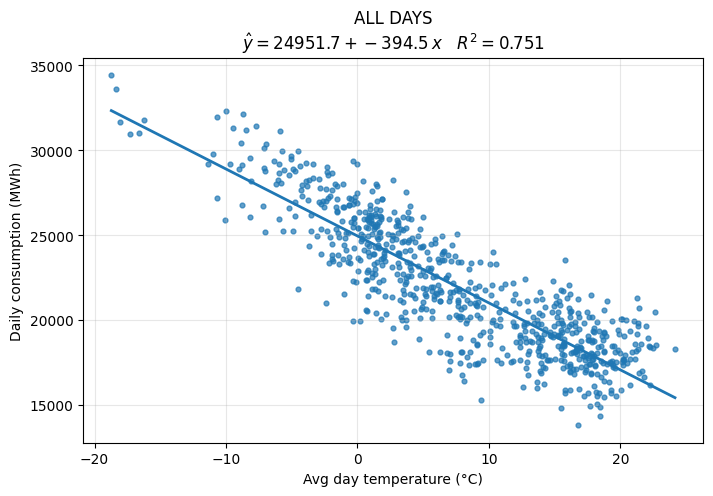

[saved] output\regression_workdays.png


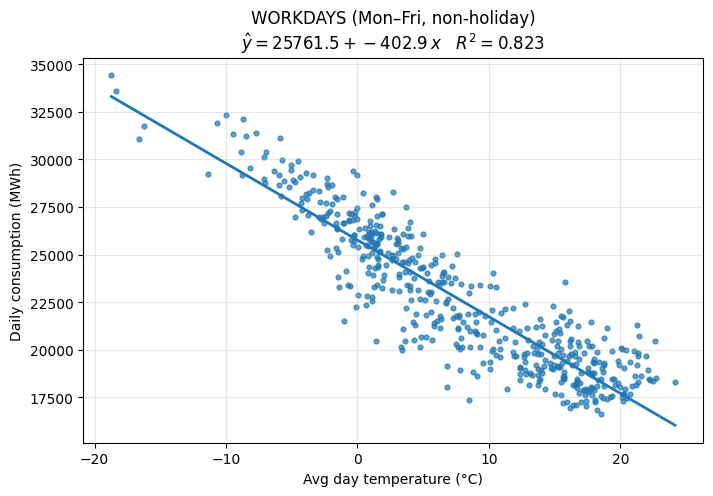

[saved] output\regression_offdays.png


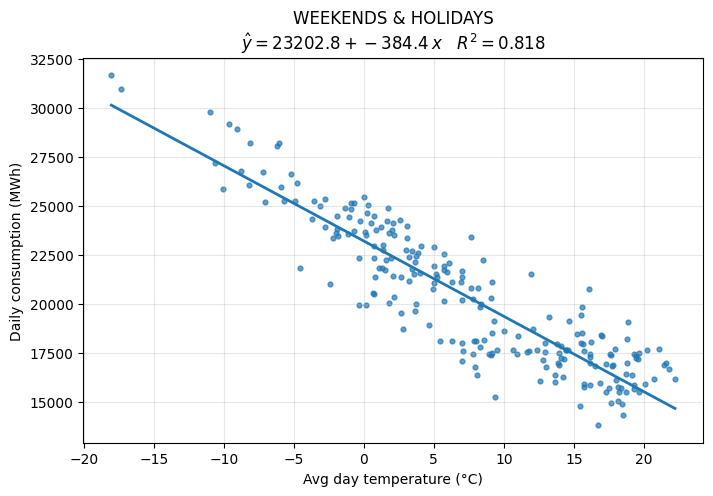

=== MERGED: shape === (731, 5)
=== MERGED: date range === 2023-09-19 00:00:00 → 2025-09-18 00:00:00

=== MERGED: dtypes ===
sum_cons_date         datetime64[ns]
sum_el_daily_value           float64
hour_day_value               Float64
is_weekend                      bool
is_holiday                      bool
dtype: object

=== MERGED: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sum_cons_date       731 non-null    datetime64[ns]
 1   sum_el_daily_value  731 non-null    float64       
 2   hour_day_value      731 non-null    Float64       
 3   is_weekend          731 non-null    bool          
 4   is_holiday          731 non-null    bool          
dtypes: Float64(1), bool(2), datetime64[ns](1), float64(1)
memory usage: 19.4 KB

[saved] output\reg_daily_merged_all.csv
[saved] output\reg_daily_merged_la

In [29]:
# --- Regression (daily): preview + fit + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
MONTHS = 24
TZ = "Europe/Tallinn"
EXCLUDE_TODAY = True
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from regression_analysis import load_daily_frames, run_linreg
except Exception as e:
    raise ImportError(f"Could not import regression_analysis.py from {SCRIPTS_DIR}: {e}")

# 1) Load merged daily frame (consumption + temperature, EE calendar)
merged = load_daily_frames(months=MONTHS, exclude_today=EXCLUDE_TODAY, tz=TZ).copy()

# Make sure date is datetime for preview slicing
merged["sum_cons_date"] = pd.to_datetime(merged["sum_cons_date"], errors="coerce")

# 2) Preview window: last 30 days (mask, future-proof)
idxed = merged.set_index("sum_cons_date").sort_index()
if len(idxed) == 0:
    raise RuntimeError("Merged dataset is empty.")
end_d = idxed.index.max()
start_d = end_d - pd.Timedelta(days=30)
last_30d = idxed.loc[start_d:end_d].reset_index()

display(last_30d)

# 3) Fit regression(s)
def _fit_and_pack(df, label):
    """Fit using run_linreg and pack metrics into a dict."""
    x = df["hour_day_value"].to_numpy(dtype=float)
    y = df["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)
    return {
        "label": label,
        "slope": slope,
        "intercept": intercept,
        "r": r,
        "r2": r2,
        "p_value": p,
        "rmse": rmse,
        "mae": mae,
        "nrows": len(df),
        "date_min": df["sum_cons_date"].min(),
        "date_max": df["sum_cons_date"].max(),
    }

metrics_rows = []
# ALL days
metrics_rows.append(_fit_and_pack(merged, "ALL_DAYS"))

# Segments (if flags present)
has_flags = {"is_weekend", "is_holiday"}.issubset(merged.columns)
if has_flags:
    workdays = merged[(~merged["is_weekend"]) & (~merged["is_holiday"])].copy()
    offdays  = merged[( merged["is_weekend"]) | ( merged["is_holiday"])].copy()
    if not workdays.empty:
        metrics_rows.append(_fit_and_pack(workdays, "WORKDAYS"))
    if not offdays.empty:
        metrics_rows.append(_fit_and_pack(offdays, "WEEKENDS_HOLIDAYS"))

metrics_df = pd.DataFrame(metrics_rows)
display(metrics_df)

# 4) Plot: ALL days (scatter + fit line)
def _plot_scatter_fit(df, title, path_png=None):
    x = df["hour_day_value"].to_numpy(dtype=float)
    y = df["sum_el_daily_value"].to_numpy(dtype=float)
    slope, intercept, r, r2, p, rmse, mae = run_linreg(x, y)

    xline = np.linspace(np.nanmin(x), np.nanmax(x), 100)
    yline = intercept + slope * xline

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(x, y, s=12, alpha=0.7)
    ax.plot(xline, yline, linewidth=2)

    try:
        eq_text = rf"$\hat{{y}} = {intercept:.1f} + {slope:.1f}\,x$   $R^2={r2:.3f}$"
        ax.set_title(f"{title}\n{eq_text}")
    except Exception:
        ax.set_title(title)

    ax.set_xlabel("Avg day temperature (°C)")
    ax.set_ylabel("Daily consumption (MWh)")
    ax.grid(True, alpha=0.3)

    if path_png is not None:
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)

_plot_scatter_fit(merged, "ALL DAYS", OUTDIR / "regression_all_days.png" if SAVE_PNG else None)

if has_flags:
    if not workdays.empty:
        _plot_scatter_fit(workdays, "WORKDAYS (Mon–Fri, non-holiday)",
                          OUTDIR / "regression_workdays.png" if SAVE_PNG else None)
    if not offdays.empty:
        _plot_scatter_fit(offdays, "WEEKENDS & HOLIDAYS",
                          OUTDIR / "regression_offdays.png" if SAVE_PNG else None)

# 5) Data types & quick info
print("=== MERGED: shape ===", merged.shape)
print("=== MERGED: date range ===", merged["sum_cons_date"].min(), "→", merged["sum_cons_date"].max())
print("\n=== MERGED: dtypes ===")
print(merged.dtypes)
print("\n=== MERGED: .info() ===")
merged.info()

# 6) Optional: save CSVs
if SAVE_CSV:
    merged.to_csv(OUTDIR / "reg_daily_merged_all.csv", index=False)
    last_30d.to_csv(OUTDIR / "reg_daily_merged_last30d_preview.csv", index=False)
    metrics_df.to_csv(OUTDIR / "regression_metrics.csv", index=False)
    print(f"\n[saved] {OUTDIR/'reg_daily_merged_all.csv'}")
    print(f"[saved] {OUTDIR/'reg_daily_merged_last30d_preview.csv'}")
    print(f"[saved] {OUTDIR/'regression_metrics.csv'}")


## How to use — Bias correction factors (season/month, optional segmentation)

**What this cell does**
- Calls `bias_analysis.get_bias_factors(mode, segmented, months, exclude_today)` to compute **bias correction factors**:
  - `mode="season"` → factors per **season** (`talv`, `kevad`, `suvi`, `sügis`)
  - `mode="month"`  → factors per **month** (`1..12`)
  - `segmented=True` → separate factors for **workday/offday** (keys like `workday:talv`, `offday:7`)
- Displays the **factor table** and a **bar chart**, prints **dtypes** and **`.info()`**.
- Optionally **saves**:
  - the factor **table (CSV)** to `./output/`,
  - the factor **map (JSON)** to `./output/`,
  - the **plot (PNG)** to `./output/`.

**Before you run**
- This notebook should sit in the **same folder** as `bias_analysis.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`.

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"`.
- `SEGMENTED`: `True` to compute separate factors for workday vs offday.
- `MONTHS`: how much history to use (e.g., 24).
- `EXCLUDE_TODAY`: keep `True` to avoid partial data for the last day.
- `SAVE_CSV`, `SAVE_JSON`, `SAVE_PNG`: whether to write outputs to `./output/`.

**Run**
- Execute the cell; you’ll get:
  - a **table** of bias factors (and supporting stats),
  - a **bar chart** (per season or per month; segmented charts show both segments),
  - printed **dtypes** and **`.info()`**,
  - printed **meta** (time window used, segmentation flag).

**Outputs (if saving is enabled)**
- `output/bias_<mode>[_seg]_TABLE_<YYYYMMDD>_<YYYYMMDD>.csv`
- `output/bias_<mode>[_seg]_FACTORS_<YYYYMMDD>_<YYYYMMDD>.json`
- `output/bias_<mode>[_seg]_PLOT_<YYYYMMDD>_<YYYYMMDD>.png`

**Apply to a forecast (example)**
- Use `bias_analysis.apply_bias_to_forecast(df, predicted_col="yhat_consumption", date_col="date_local", factors=factors, mode=BIAS_MODE, segmented=SEGMENTED)` to get a **bias-adjusted** prediction column.

**Troubleshooting**
- *ImportError:* ensure `bias_analysis.py` is reachable from the notebook’s working directory.
- *Empty/odd outputs:* adjust `MONTHS`, confirm upstream regression/merging works, and keep all data in **Europe/Tallinn**.


=== META ===
BiasMeta(mode='season', segmented=True, months=24, exclude_today=True, period_start='20230919', period_end='20250918', schema_version='1.0')

=== FACTOR TABLE (head) ===


,segment,season,avg_bias_factor,months
0,offday,kevad,0.946425,6
1,offday,suvi,1.016177,6
2,offday,sügis,1.020297,7
3,offday,talv,1.025588,6
4,workday,kevad,0.947274,6
5,workday,suvi,1.008894,6
6,workday,sügis,1.012036,7
7,workday,talv,1.031708,6



=== FACTOR MAP (first 12 keys) ===


,key,factor
0,offday:kevad,0.946425
1,offday:suvi,1.016177
2,offday:sügis,1.020297
3,offday:talv,1.025588
4,workday:kevad,0.947274
5,workday:suvi,1.008894
6,workday:sügis,1.012036
7,workday:talv,1.031708


[saved] output\bias_season_seg_PLOT_20230919_20250918.png


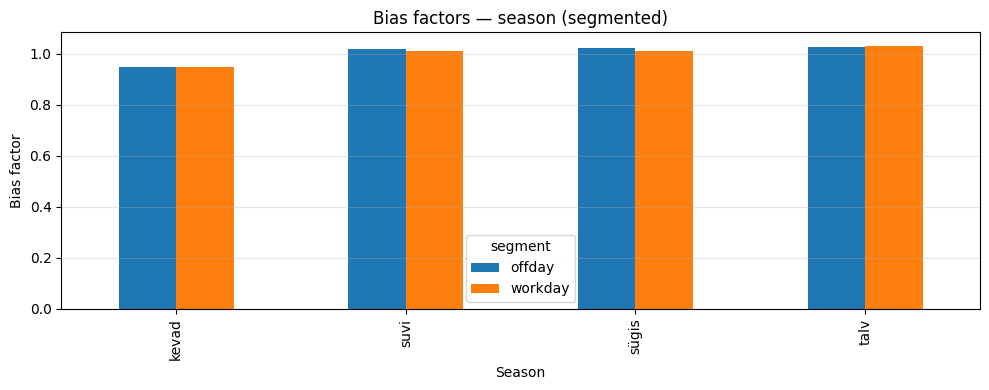


=== TABLE: dtypes ===
segment             object
season              object
avg_bias_factor    float64
months               int64
dtype: object

=== TABLE: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   segment          8 non-null      object 
 1   season           8 non-null      object 
 2   avg_bias_factor  8 non-null      float64
 3   months           8 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 388.0+ bytes
[saved] output\bias_season_seg_TABLE_20230919_20250918.csv
[saved] output\bias_season_seg_FACTORS_20230919_20250918.json


In [30]:
# --- Bias correction factors: table + plot + dtypes + optional CSV/JSON/PNG ---
from pathlib import Path
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"   # 'season' or 'month'
SEGMENTED = True       # True -> separate factors for workday/offday
MONTHS = 24
EXCLUDE_TODAY = True
SAVE_CSV = True
SAVE_JSON = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from bias_analysis import get_bias_factors, apply_bias_to_forecast
except Exception as e:
    raise ImportError(f"Could not import bias_analysis.py from {SCRIPTS_DIR}: {e}")

# 1) Compute bias factors
factors, meta, table = get_bias_factors(
    mode=BIAS_MODE,
    segmented=SEGMENTED,
    months=MONTHS,
    exclude_today=EXCLUDE_TODAY
)

# Pretty-print meta (dataclass)
print("=== META ===")
print(meta)

# Show raw table and a normalized view of factor map
print("\n=== FACTOR TABLE (head) ===")
display(table.head(12))

print("\n=== FACTOR MAP (first 12 keys) ===")
fact_df = pd.DataFrame(list(factors.items()), columns=["key", "factor"]).sort_values("key")
display(fact_df.head(12))

# 2) Plot — bar chart for season or month, segmented-aware
OUTDIR.mkdir(parents=True, exist_ok=True)
png_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_PLOT_{meta.period_start}_{meta.period_end}.png"
png_path = OUTDIR / png_name

def _plot_bias_table(tbl: pd.DataFrame, mode: str, segmented: bool, out_path=None):
    fig, ax = plt.subplots(figsize=(10, 4))
    if not segmented:
        if mode == "season":
            (tbl.set_index("season")["avg_bias_factor"]
                .sort_index()
                .plot(kind="bar", ax=ax))
            ax.set_xlabel("Season")
        else:  # month
            (tbl.set_index("month_num")["avg_bias_factor"]
                .sort_index()
                .plot(kind="bar", ax=ax))
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (unsegmented)")
    else:
        if mode == "season":
            pvt = tbl.pivot(index="season", columns="segment", values="avg_bias_factor").sort_index()
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Season")
        else:  # month
            pvt = tbl.pivot(index="month_num", columns="segment", values="avg_bias_factor").sort_index()
            pvt.plot(kind="bar", ax=ax)
            ax.set_xlabel("Month (1..12)")
        ax.set_ylabel("Bias factor")
        ax.set_title(f"Bias factors — {mode} (segmented)")
    ax.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    if out_path is not None:
        fig.savefig(out_path, dpi=FIG_DPI)
        print(f"[saved] {out_path}")
    plt.show()

_plot_bias_table(table, BIAS_MODE, SEGMENTED, png_path if SAVE_PNG else None)

# 3) Data types & quick info
print("\n=== TABLE: dtypes ===")
print(table.dtypes)
print("\n=== TABLE: .info() ===")
table.info()

# 4) Optional: save artifacts (CSV + JSON factor map)
if SAVE_CSV:
    csv_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_TABLE_{meta.period_start}_{meta.period_end}.csv"
    csv_path = OUTDIR / csv_name
    table.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")

if SAVE_JSON:
    json_name = f"bias_{BIAS_MODE}{'_seg' if SEGMENTED else ''}_FACTORS_{meta.period_start}_{meta.period_end}.json"
    json_path = OUTDIR / json_name
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(factors, f, ensure_ascii=False, indent=2)
    print(f"[saved] {json_path}")

# 5) (Optional) How to apply to a forecast — small demo (commented)
# from el_consumption_forecast import forecast_next7
# daily_fc = forecast_next7(mode=BIAS_MODE, segmented_bias=False, months_hist=MONTHS)
# # Ensure columns needed by apply_bias_to_forecast:
# # - If mode='season': you need 'season' or a date column to derive it
# # - If mode='month' : you need 'month_num' or a date column to derive it
# # - If segmented=True: you need 'segment' (workday/offday)
# daily_fc_bias = apply_bias_to_forecast(
#     df=daily_fc,
#     predicted_col="yhat_consumption",
#     date_col="date_local",
#     factors=factors,
#     mode=BIAS_MODE,
#     segmented=SEGMENTED,
#     out_col="yhat_consumption_bias_adj"
# )
# display(daily_fc_bias)


## How to use — Temperature forecast (next 7 days)

**What this cell does**
- Calls `temp_forecast.get_next7_forecast(...)` to fetch a **7-day temperature forecast** as **daily averages** on the **Europe/Tallinn** calendar (starting **tomorrow**).
- Displays the **7 forecast rows**, draws a **line chart** of `EE_avg`, prints **dtypes** and **`.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/temp_forecast_daily_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`
  - the figure PNG to `./output/temp_forecast_daily_next7.png`

**Before you run**
- Place the notebook in the **same folder** as `temp_forecast.py`.
- Required packages: `pandas`, `matplotlib`, `meteostat` (the script already relies on it).

**Parameters in the cell**
- `TZ`: time zone (keep `"Europe/Tallinn"`).
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.
- You can pass custom Meteostat `Point`s to `get_next7_forecast(points=...)` if needed.

**Run**
- Execute the cell. You’ll see:
  - the **7-row** table with `EE_avg` and city columns,
  - a **line chart** of `EE_avg`,
  - printed **dtypes** and **`.info()`**.

**Customize**
- Show only specific cities: sub-select columns after loading.
- Prefer bars? Change the plot kind to bar for `EE_avg`.
- Want to overlay city lines? Add a second plot using `df[city_cols].plot(...)`.

**Troubleshooting**
- *ImportError:* ensure `temp_forecast.py` is in the working directory or adjust `sys.path`.
- *Empty output:* Meteostat might be temporarily unavailable, or the forecast window returned no values.


,date_local,Tallinn,Tartu,Pärnu,Narva,Kuressaare,EE_avg
0,2025-09-20,15.3,14.3,16.0,13.7,16.7,15.2
1,2025-09-21,16.9,17.2,17.0,16.3,17.1,16.9
2,2025-09-22,14.9,15.8,15.6,15.7,16.0,15.6
3,2025-09-23,11.2,11.3,12.7,10.9,12.4,11.7
4,2025-09-24,9.7,9.2,11.2,8.6,10.5,9.8
5,2025-09-25,10.1,8.7,11.3,8.4,10.4,9.8
6,2025-09-26,10.3,9.6,11.5,9.0,11.2,10.3


[saved] output\temp_forecast_daily_next7.png


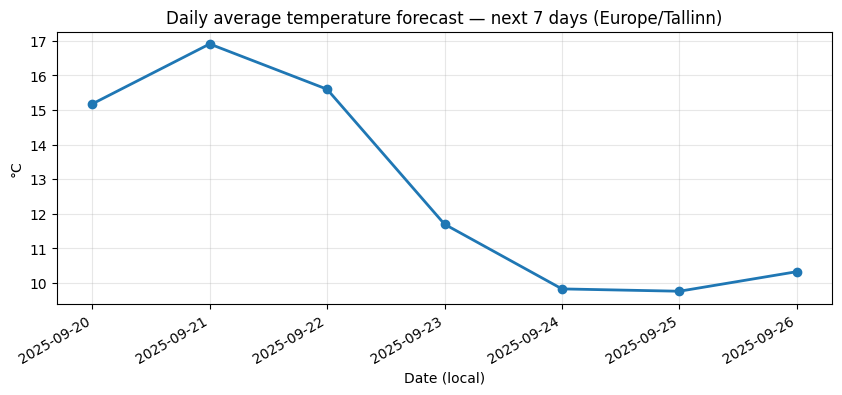

=== TEMP FORECAST: shape === (7, 6)
=== TEMP FORECAST: date range === 2025-09-20 00:00:00+03:00 → 2025-09-26 00:00:00+03:00

=== TEMP FORECAST: dtypes ===
Tallinn       Float64
Tartu         Float64
Pärnu         Float64
Narva         Float64
Kuressaare    Float64
EE_avg        Float64
dtype: object

=== TEMP FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2025-09-20 00:00:00+03:00 to 2025-09-26 00:00:00+03:00
Freq: D
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tallinn     7 non-null      Float64
 1   Tartu       7 non-null      Float64
 2   Pärnu       7 non-null      Float64
 3   Narva       7 non-null      Float64
 4   Kuressaare  7 non-null      Float64
 5   EE_avg      7 non-null      Float64
dtypes: Float64(6)
memory usage: 434.0 bytes
[saved] output\temp_forecast_daily_next7_tallinn_20250920_20250926.csv


In [31]:
# --- Temperature forecast (next 7 days): table + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
TZ = "Europe/Tallinn"
SAVE_CSV = True
SAVE_PNG = True
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from temp_forecast import get_next7_forecast
except Exception as e:
    raise ImportError(f"Could not import temp_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Get forecast (7 rows, starting tomorrow; index is local calendar dates)
df = get_next7_forecast(tz=TZ).copy()

if df.empty:
    raise RuntimeError("Temperature forecast returned an empty DataFrame.")

# Identify city columns (all except EE_avg)
city_cols = [c for c in df.columns if c != "EE_avg"]

# Pretty print table (date as YYYY-MM-DD)
out_tbl = df.round(1).reset_index()
out_tbl["date_local"] = pd.to_datetime(out_tbl["date_local"]).dt.strftime("%Y-%m-%d")
display(out_tbl[["date_local"] + city_cols + ["EE_avg"]])

# 2) Plot: EE_avg (line). Change to bar if preferred.
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.index, df["EE_avg"], marker="o", linewidth=2)
ax.set_title("Daily average temperature forecast — next 7 days (Europe/Tallinn)")
ax.set_xlabel("Date (local)")
ax.set_ylabel("°C")
ax.grid(True, alpha=0.3)
fig.autofmt_xdate()

OUTDIR.mkdir(parents=True, exist_ok=True)
if SAVE_PNG:
    png_path = OUTDIR / "temp_forecast_daily_next7.png"
    fig.savefig(png_path, dpi=FIG_DPI)
    print(f"[saved] {png_path}")
plt.show()

# 3) Data types & quick info
print("=== TEMP FORECAST: shape ===", df.shape)
print("=== TEMP FORECAST: date range ===", df.index.min(), "→", df.index.max())
print("\n=== TEMP FORECAST: dtypes ===")
print(df.dtypes)
print("\n=== TEMP FORECAST: .info() ===")
df.info()

# 4) Optional: save CSV with period in filename (matching the module's CLI style)
if SAVE_CSV:
    today_local = pd.Timestamp.now(tz=TZ).normalize()
    start = today_local + pd.Timedelta(days=1)
    end = start + pd.Timedelta(days=6)
    s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")

    csv_path = OUTDIR / f"temp_forecast_daily_next7_tallinn_{s_str}_{e_str}.csv"
    out_tbl.to_csv(csv_path, index=False)
    print(f"[saved] {csv_path}")


## How to use — Daily consumption forecast (next 7 days)

**What this cell does**
- Calls `el_consumption_forecast.forecast_next7(...)` to produce a **7-day daily consumption forecast** starting **tomorrow** (Europe/Tallinn).
- Displays the **7 forecast rows**, draws a **dual-axis chart** (bars = consumption, line = temperature), prints **dtypes** and **`.info()`**.
- Optionally saves:
  - the forecast CSV to `./output/forecast_consumption_daily_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`
  - the figure PNG to `./output/forecast_consumption_daily_next7.png`

**Before you run**
- Place the notebook in the **same folder** as `el_consumption_forecast.py` (and its dependencies).
- Recommended packages: `pandas`, `numpy`, `matplotlib`, `holidays` (for EE holidays), `meteostat`.
- Upstream scripts should be functional (`bias_analysis.py`, `regression_analysis.py`, `temp_forecast.py`).

**Parameters in the cell**
- `BIAS_MODE`: `"season"` or `"month"` — which bias factors to apply.
- `SEGMENTED_BIAS`: `True` applies bias by segment (`workday`/`offday`) *and* season/month; `False` ignores segment.
- `MONTHS_HIST`: how much history to use for models/bias (in months).
- `TEMP_MODULE` / `TEMP_CSV`: where to get the 7-day temperature forecast (module or CSV).
- `SAVE_CSV`, `SAVE_PNG`: whether to save outputs.

**Run**
- Execute the cell. You’ll see:
  - the **7-row** forecast table (`date_local`, `yhat_consumption`, `EE_avg_temp_C`, `segment`, `season`, `bias_factor`, …),
  - a **dual-axis** chart,
  - printed **dtypes** and **`.info()`**.

**Customize**
- Switch bias mode: set `BIAS_MODE = "month"` or `"season"`.
- Turn segmented bias off: `SEGMENTED_BIAS = False`.
- Provide an explicit temperature source: set `TEMP_MODULE = "temp_forecast.py"` or `TEMP_CSV = "path/to/temp.csv"`.

**Troubleshooting**
- *ImportError:* ensure `el_consumption_forecast.py` and its dependencies are reachable.
- *Missing columns:* check upstream scripts; the forecast function relies on regressions and bias factors being available.


,date_local,weekday,is_weekend,is_holiday,segment,season,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-20,Saturday,True,False,offday,sügis,9,15.17,offday:sügis,1.020297,17370.73,17723.32
1,2025-09-21,Sunday,True,False,offday,sügis,9,16.90,offday:sügis,1.020297,16705.42,17044.50
2,2025-09-22,Monday,False,False,workday,sügis,9,15.60,workday:sügis,1.012036,19478.09,19712.53
3,2025-09-23,Tuesday,False,False,workday,sügis,9,11.70,workday:sügis,1.012036,21047.94,21301.27
4,2025-09-24,Wednesday,False,False,workday,sügis,9,9.83,workday:sügis,1.012036,21800.29,22062.69
5,2025-09-25,Thursday,False,False,workday,sügis,9,9.76,workday:sügis,1.012036,21827.49,22090.21
6,2025-09-26,Friday,False,False,workday,sügis,9,10.33,workday:sügis,1.012036,21599.87,21859.85


[saved] output\forecast_consumption_daily_next7.png


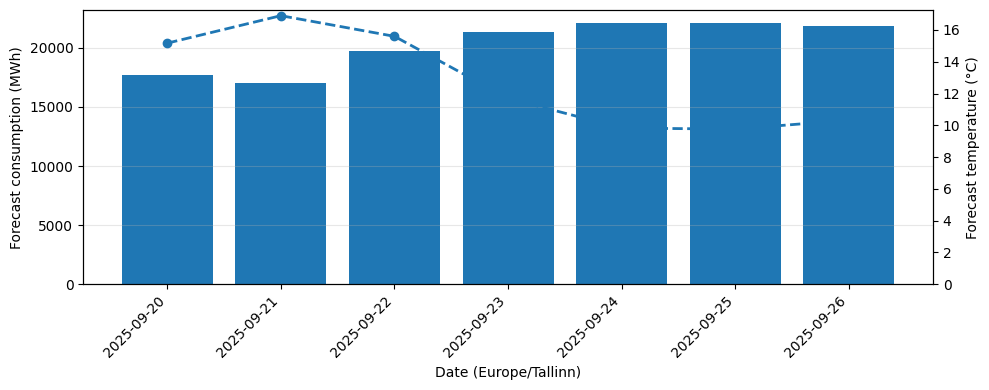

=== DAILY FORECAST: shape === (7, 12)
=== DAILY FORECAST: date range === 2025-09-20 → 2025-09-26

=== DAILY FORECAST: dtypes ===
date_local           object
weekday              object
is_weekend             bool
is_holiday             bool
segment              object
season               object
month_num             int32
EE_avg_temp_C       float64
bias_key             object
bias_factor         float64
yhat_base           float64
yhat_consumption    float64
dtype: object

=== DAILY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        7 non-null      object 
 1   weekday           7 non-null      object 
 2   is_weekend        7 non-null      bool   
 3   is_holiday        7 non-null      bool   
 4   segment           7 non-null      object 
 5   season            7 non-null      object 
 6   month_

In [32]:
# --- Daily consumption forecast (next 7 days): table + plot + dtypes + optional CSV/PNG ---
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
BIAS_MODE = "season"       # 'season' or 'month'
SEGMENTED_BIAS = True      # apply segment-specific bias (workday/offday)
MONTHS_HIST = 24           # history used to fit regressions and bias
TEMP_MODULE = "temp_forecast.py"  # None to auto-detect, or path/module name
TEMP_CSV = None            # alternative CSV path (set to string if you prefer CSV)
SAVE_CSV = True
SAVE_PNG = True
TZ = "Europe/Tallinn"
OUTDIR = Path("output")
FIG_DPI = 130

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from el_consumption_forecast import forecast_next7
except Exception as e:
    raise ImportError(f"Could not import el_consumption_forecast.py from {SCRIPTS_DIR}: {e}")

# 1) Run forecast (7 rows, starting tomorrow, Europe/Tallinn)
out = forecast_next7(
    mode=BIAS_MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
).copy()

display(out)

# 2) Plot (dual-axis: bars = yhat_consumption, line = EE_avg_temp_C)
def dual_axis_daily_plot(df: pd.DataFrame, path_png=None):
    dates = pd.to_datetime(df["date_local"])
    x = np.arange(len(dates))
    fig, ax1 = plt.subplots(figsize=(10, 4))

    # Bars: consumption
    ax1.bar(x, df["yhat_consumption"].to_numpy(dtype=float))
    ax1.set_ylabel("Forecast consumption (MWh)")
    ax1.set_ylim(bottom=0)
    ax1.grid(True, axis="y", alpha=0.3)

    # Line: temperature (twin axis)
    ax2 = ax1.twinx()
    ax2.plot(x, df["EE_avg_temp_C"].to_numpy(dtype=float), marker="o", linestyle="--", linewidth=2)
    ax2.set_ylabel("Forecast temperature (°C)")
    # reasonable lower bound
    ax2.set_ylim(bottom=min(0, np.nanmin(df["EE_avg_temp_C"].to_numpy(dtype=float))))

    ax1.set_xticks(x)
    ax1.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates], rotation=45, ha="right")
    ax1.set_xlabel("Date (Europe/Tallinn)")
    plt.tight_layout()

    if path_png is not None:
        fig.savefig(path_png, dpi=FIG_DPI)
        print(f"[saved] {path_png}")
    plt.show()

OUTDIR.mkdir(parents=True, exist_ok=True)
png_path = OUTDIR / "forecast_consumption_daily_next7.png" if SAVE_PNG else None
dual_axis_daily_plot(out, png_path)

# 3) Data types & quick info
print("=== DAILY FORECAST: shape ===", out.shape)
print("=== DAILY FORECAST: date range ===", out["date_local"].min(), "→", out["date_local"].max())
print("\n=== DAILY FORECAST: dtypes ===")
print(out.dtypes)
print("\n=== DAILY FORECAST: .info() ===")
out.info()

# 4) Optional: save CSV with period in filename
if SAVE_CSV:
    today_local = pd.Timestamp.now(tz=TZ).normalize()
    start = today_local + pd.Timedelta(days=1)
    end = start + pd.Timedelta(days=6)
    s_str, e_str = start.strftime("%Y%m%d"), end.strftime("%Y%m%d")
    csv_path = OUTDIR / f"forecast_consumption_daily_next7_tallinn_{s_str}_{e_str}.csv"
    out.to_csv(csv_path, index=False)
    print(f"\n[saved] {csv_path}")


## How to use — Weekday load profiles (24×7 share matrix)

**What this cell does**
- Builds a **24×7 matrix** of average hourly shares per weekday using `weekday_profile.get_weekday_hour_share_matrix(...)`.  
  Each column (weekday) sums to **1.0**. Europe/Tallinn time; today and EE public holidays are excluded by default. :contentReference[oaicite:0]{index=0}
- Shows the **matrix preview** and **days used** (the last *N* dates per weekday).
- Draws a **heatmap** (hours × weekday) and prints **dtypes** / **`.info()`**.
- Optionally saves two CSVs to `./output/`: the **matrix** and the **days used**.

**Before you run**
- Place the notebook in the **same folder** as `weekday_profile.py` (and `elering_consumption.py` if you fetch hourly data via API).
- Required packages: `pandas`, `matplotlib`, and `holidays` (recommended for EE public holidays).

**Parameters in the cell**
- `LAST_N`: how many **most recent occurrences** of each weekday to average (e.g., 6).
- `EXCLUDE_TODAY`: keep `True` to avoid today’s partial day.
- `HOURLY_CSV` (optional): path to an hourly CSV; if omitted, the cell uses `elering_consumption.get_hourly_consumption(...)`.
- `CSV_TZ`: time zone to assume for **naive** timestamps in `HOURLY_CSV` (e.g., `"UTC"`).
- `MONTHS`: how much history to scan.
- `SAVE_CSV`: whether to save outputs to `./output/`.

**Run**
- Execute the cell; you’ll see:
  - the **24×7** matrix and the **days used** table,
  - a **heatmap** of shares,
  - printed **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/weekday_share_matrix.csv`
- `output/weekday_days_used.csv`

**Customize**
- To include holidays in training (not recommended), set `EXCLUDE_TODAY=False` and fork the code to skip holiday filtering.
- To train from a specific data dump, set `HOURLY_CSV="path/to/hourly.csv"` and `CSV_TZ="UTC"` if the file is UTC-naive.

**Troubleshooting**
- *ImportError:* ensure the scripts are reachable from the notebook folder.
- *Empty matrix:* widen `MONTHS`, reduce `LAST_N`, or double-check that today/holidays exclusion doesn’t drop everything. :contentReference[oaicite:1]{index=1}


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_local,,,,,,,
0,0.0335,0.0345,0.0355,0.0350,0.0363,0.0382,0.0382
1,0.0318,0.0329,0.0341,0.0332,0.0338,0.0364,0.0362
2,0.0313,0.0319,0.0331,0.0326,0.0331,0.0352,0.0353
3,0.0311,0.0315,0.0329,0.0326,0.0331,0.0345,0.0347
4,0.0313,0.0317,0.0331,0.0329,0.0332,0.0343,0.0345
5,0.0326,0.0333,0.0340,0.0338,0.0341,0.0347,0.0347
6,0.0369,0.0379,0.0392,0.0384,0.0379,0.0360,0.0359
7,0.0427,0.0439,0.0451,0.0441,0.0435,0.0394,0.0390
8,0.0468,0.0479,0.0478,0.0483,0.0467,0.0420,0.0419


,weekday,date_local
0,Friday,2025-08-08
1,Friday,2025-08-15
2,Friday,2025-08-22
3,Friday,2025-08-29
4,Friday,2025-09-05
5,Friday,2025-09-12
6,Monday,2025-08-11
7,Monday,2025-08-18
8,Monday,2025-08-25
9,Monday,2025-09-01


Max |col_sum - 1.0| = 0.0


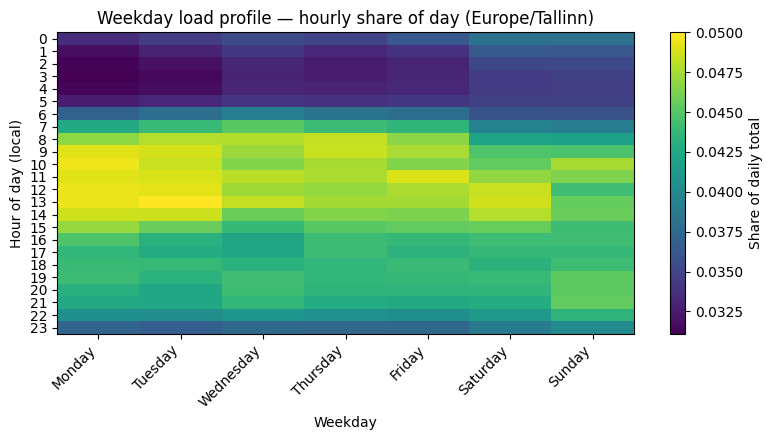


=== MATRIX: dtypes ===
weekday
Monday       float64
Tuesday      float64
Wednesday    float64
Thursday     float64
Friday       float64
Saturday     float64
Sunday       float64
dtype: object

=== DAYS USED: dtypes ===
weekday       object
date_local    object
dtype: object

=== MATRIX: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monday     24 non-null     float64
 1   Tuesday    24 non-null     float64
 2   Wednesday  24 non-null     float64
 3   Thursday   24 non-null     float64
 4   Friday     24 non-null     float64
 5   Saturday   24 non-null     float64
 6   Sunday     24 non-null     float64
dtypes: float64(7)
memory usage: 1.4 KB

=== DAYS USED: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ----------

In [33]:
# --- Weekday load profiles: 24×7 share matrix + days used + heatmap + dtypes + optional CSV ---
from pathlib import Path
import sys
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
LAST_N = 6
EXCLUDE_TODAY = True
HOURLY_CSV = None        # e.g., "output/elering_consumption_hourly_last24months_tallinn_*.csv"
CSV_TZ = "Europe/Tallinn" # if HOURLY_CSV has tz-naive timestamps, set their zone (e.g. "UTC")
MONTHS = 24
SAVE_CSV = True
OUTDIR = Path("output")

# Ensure module import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))

try:
    from weekday_profile import (
        get_weekday_hour_share_matrix,
        get_weekday_days_used,
        WEEKDAY_ORDER,
    )
except Exception as e:
    raise ImportError(f"Could not import weekday_profile.py from {SCRIPTS_DIR}: {e}")

# 1) Build matrix & days used
M = get_weekday_hour_share_matrix(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)
DU = get_weekday_days_used(
    last_n=LAST_N,
    exclude_today=EXCLUDE_TODAY,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months=MONTHS,
)

# Preview tables
display(M.round(4))
display(DU.head(21))

# Quick validation: each weekday column must sum to 1.0
col_sums = M.sum(axis=0, skipna=True)
check = (col_sums - 1.0).abs().max()
print("Max |col_sum - 1.0| =", float(check))

# 2) Heatmap (hours × weekday)
fig, ax = plt.subplots(figsize=(8, 4.5))
im = ax.imshow(M[WEEKDAY_ORDER].to_numpy(dtype=float), aspect="auto", origin="upper")
ax.set_title("Weekday load profile — hourly share of day (Europe/Tallinn)")
ax.set_xlabel("Weekday")
ax.set_ylabel("Hour of day (local)")
ax.set_xticks(range(len(WEEKDAY_ORDER)))
ax.set_xticklabels(WEEKDAY_ORDER, rotation=45, ha="right")
ax.set_yticks(range(24))
fig.colorbar(im, ax=ax, label="Share of daily total")
plt.tight_layout()
plt.show()

# 3) dtypes & info
print("\n=== MATRIX: dtypes ===")
print(M.dtypes)
print("\n=== DAYS USED: dtypes ===")
print(DU.dtypes)
print("\n=== MATRIX: .info() ===")
M.info()
print("\n=== DAYS USED: .info() ===")
DU.info()

# 4) Optional: save CSVs
if SAVE_CSV:
    OUTDIR.mkdir(parents=True, exist_ok=True)
    M.to_csv(OUTDIR / "weekday_share_matrix.csv", index=True)
    DU.to_csv(OUTDIR / "weekday_days_used.csv", index=False)
    print(f"\n[saved] {OUTDIR/'weekday_share_matrix.csv'}")
    print(f"[saved] {OUTDIR/'weekday_days_used.csv'}")


## How to use — Hourly consumption forecast (next 7 days)

**What this cell does**
- Calls `electricity_hourly_forecast.main(...)` to produce a **7-day hourly forecast** in **Europe/Tallinn**.
- Under the hood it:
  1) gets the **daily forecast** (either from CSV or by calling `forecast_next7`),
  2) builds/uses **weekday load profiles** (DST-aware, holidays handled),
  3) **splits** days into hours and **checks sums** match daily totals.
- Shows a **48-row preview**, verifies **hourly vs daily** sums, draws a **bar chart** for the **first forecast day**, prints **dtypes** and **`.info()`**.
- Optionally lets the module **save a CSV** to `./output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`.

**Before you run**
- Keep the notebook in the **same folder** as `electricity_hourly_forecast.py` and its dependencies.
- Recommended packages: `pandas`, `matplotlib`, plus whatever your upstream scripts require (`holidays`, `meteostat`).

**Parameters in the cell**
- `DAILY_CSV`: path to an existing **daily** forecast (with `date_local,yhat_consumption`). If `None`, the module computes one internally.
- `MODE` / `SEGMENTED_BIAS` / `MONTHS_HIST` / `TEMP_MODULE` / `TEMP_CSV`: forwarded to daily forecast step if `DAILY_CSV=None`.
- `LAST_N`, `HOLIDAY_PROFILE`, `HOURLY_CSV`, `CSV_TZ`, `MONTHS_FOR_PROFILE`: weekday profile training options.
- `SAVE_CSV`: if `True`, the module saves the hourly CSV to `./output/`.

**Run**
- Execute the cell. You’ll see:
  - **48 preview rows**,
  - a **sum check** (hourly back to daily),
  - a **bar chart** of the first forecast day,
  - printed **dtypes** and **`.info()`**.

**Outputs (if `SAVE_CSV=True`)**
- `output/forecast_consumption_hourly_next7_tallinn_YYYYMMDD_YYYYMMDD.csv`

**Customize**
- Provide a specific **daily forecast CSV** by setting `DAILY_CSV="path.csv"`.
- Train profiles from a specific hourly history dump by setting `HOURLY_CSV="path.csv"` and the correct `CSV_TZ` (e.g., `"UTC"`).
- Change the preview size (e.g., first 72 rows) or add more plots.

**Troubleshooting**
- *ImportError:* ensure the script is reachable from the notebook working directory.
- *Sum mismatch:* verify the profile matrix and DST handling; the module is DST-aware, but malformed daily inputs can lead to small discrepancies.

[kontroll] Päevasummad vs yhat_consumption — max |rel_diff| ≈ 0.00000%

=== Hourly forecast (esimesed 48 rida) ===
           datetime_local  weekday  hour_local  consumption_hourly segment season  EE_avg_temp_C  yhat_consumption  bias_factor
2025-09-20 00:00:00+03:00 Saturday           0          677.538448  offday  sügis          15.17          17723.32     1.020297
2025-09-20 01:00:00+03:00 Saturday           1          644.701524  offday  sügis          15.17          17723.32     1.020297
2025-09-20 02:00:00+03:00 Saturday           2          624.020116  offday  sügis          15.17          17723.32     1.020297
2025-09-20 03:00:00+03:00 Saturday           3          611.046149  offday  sügis          15.17          17723.32     1.020297
2025-09-20 04:00:00+03:00 Saturday           4          608.692724  offday  sügis          15.17          17723.32     1.020297
2025-09-20 05:00:00+03:00 Saturday           5          614.248621  offday  sügis          15.17          17723.32   

,datetime_local,weekday,hour_local,consumption_hourly,date_local,segment,season,is_weekend,is_holiday,month_num,EE_avg_temp_C,bias_key,bias_factor,yhat_base,yhat_consumption
0,2025-09-20 00:00:00+03:00,Saturday,0,677.538448,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
1,2025-09-20 01:00:00+03:00,Saturday,1,644.701524,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
2,2025-09-20 02:00:00+03:00,Saturday,2,624.020116,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
3,2025-09-20 03:00:00+03:00,Saturday,3,611.046149,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
4,2025-09-20 04:00:00+03:00,Saturday,4,608.692724,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
5,2025-09-20 05:00:00+03:00,Saturday,5,614.248621,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
6,2025-09-20 06:00:00+03:00,Saturday,6,638.159671,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
7,2025-09-20 07:00:00+03:00,Saturday,7,698.992613,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
8,2025-09-20 08:00:00+03:00,Saturday,8,745.222840,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32
9,2025-09-20 09:00:00+03:00,Saturday,9,793.375362,2025-09-20,offday,sügis,True,False,9,15.17,offday:sügis,1.020297,17370.73,17723.32


,date_local,sum_hourly,yhat_consumption,rel_diff
0,2025-09-20,17723.32,17723.32,0.0
1,2025-09-21,17044.50,17044.50,0.0
2,2025-09-22,19712.53,19712.53,0.0
3,2025-09-23,21301.27,21301.27,0.0
4,2025-09-24,22062.69,22062.69,0.0
5,2025-09-25,22090.21,22090.21,0.0
6,2025-09-26,21859.85,21859.85,0.0


Max |rel_diff| = 0.0


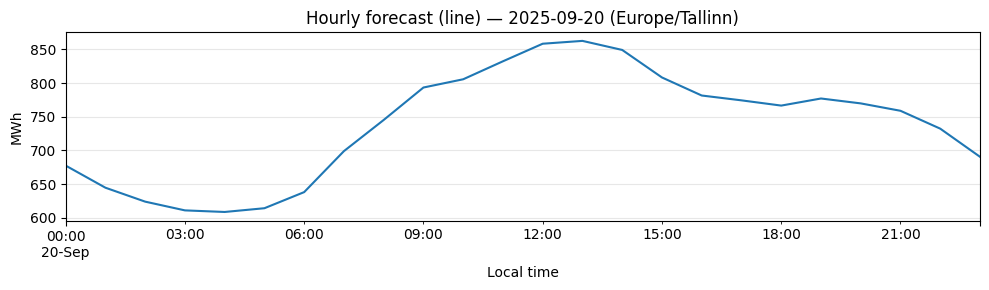


=== HOURLY FORECAST: dtypes ===
datetime_local        datetime64[ns, Europe/Tallinn]
weekday                                       object
hour_local                                     int64
consumption_hourly                           float64
date_local                                    object
segment                                       object
season                                        object
is_weekend                                      bool
is_holiday                                      bool
month_num                                      int32
EE_avg_temp_C                                float64
bias_key                                      object
bias_factor                                  float64
yhat_base                                    float64
yhat_consumption                             float64
dtype: object

=== HOURLY FORECAST: .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column        

In [34]:
# --- Hourly forecast (next 7 days): scrollable preview + sum check + LINE plot + dtypes; optional CSV ---
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# (A) Keritava tabeli helper – ei trunkeeri pikka väljundit
def display_scrollable_df(df: pd.DataFrame, n=200, max_height_px=320):
    html = df.head(n).to_html(border=0)
    display(HTML(f"<div style='max-height:{max_height_px}px; overflow:auto; border:1px solid #ddd; padding:6px'>{html}</div>"))

# (B) Pandas kuvamisvalikud (soovi korral kohanda)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 0)  # lase laiuda

# Parameetrid
DAILY_CSV = None             # nt "output/forecast_consumption_daily_next7_tallinn_YYYYMMDD_YYYYMMDD.csv"
MODE = "season"
SEGMENTED_BIAS = True
MONTHS_HIST = 24
TEMP_MODULE = "temp_forecast.py"
TEMP_CSV = None

LAST_N = 6
HOLIDAY_PROFILE = "weekday"
HOURLY_CSV = None
CSV_TZ = "Europe/Tallinn"
MONTHS_FOR_PROFILE = 24
SAVE_CSV = True

# Import
SCRIPTS_DIR = Path.cwd()
if str(SCRIPTS_DIR) not in sys.path:
    sys.path.insert(0, str(SCRIPTS_DIR))
from electricity_hourly_forecast import main as run_hourly

# 1) Käivita tunniprognoos
hourly = run_hourly(
    use_daily_csv=DAILY_CSV,
    mode=MODE,
    segmented_bias=SEGMENTED_BIAS,
    months_hist=MONTHS_HIST,
    temp_module=TEMP_MODULE,
    temp_csv=TEMP_CSV,
    last_n=LAST_N,
    holiday_profile=HOLIDAY_PROFILE,
    hourly_csv=HOURLY_CSV,
    csv_tz=CSV_TZ,
    months_for_profile=MONTHS_FOR_PROFILE,
    save_csv=SAVE_CSV,
).copy()
if hourly.empty:
    raise RuntimeError("Hourly forecast returned an empty DataFrame.")

# 2) Keritav eelvaade (esimesed 200 rida)
display_scrollable_df(hourly, n=200, max_height_px=360)

# 3) Summa-kontroll: tunnid -> päev
hourly["date_local"] = hourly["datetime_local"].dt.strftime("%Y-%m-%d")
check = (hourly.groupby("date_local")["consumption_hourly"].sum()
         .rename("sum_hourly").to_frame())
if "yhat_consumption" in hourly.columns:
    daily_in_hourly = hourly.drop_duplicates("date_local")[["date_local", "yhat_consumption"]]
    check = check.merge(daily_in_hourly, on="date_local", how="left")
elif DAILY_CSV:
    daily = pd.read_csv(DAILY_CSV)
    check = check.merge(daily[["date_local", "yhat_consumption"]], on="date_local", how="left")
check["rel_diff"] = check["sum_hourly"] / check["yhat_consumption"] - 1.0
display(check)
print("Max |rel_diff| =", float(check["rel_diff"].abs().max()))

# 4) Graafik JOONENA: esimene prognoosipäev
first_day = hourly["date_local"].min()
day_slice = hourly[hourly["date_local"] == first_day].copy()
ax = (day_slice.sort_values("datetime_local")
                 .set_index("datetime_local")["consumption_hourly"]
                 .plot(figsize=(10, 3), title=f"Hourly forecast (line) — {first_day} (Europe/Tallinn)"))
ax.set_xlabel("Local time")
ax.set_ylabel("MWh")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) dtypes & info
print("\n=== HOURLY FORECAST: dtypes ===")
print(hourly.dtypes)
print("\n=== HOURLY FORECAST: .info() ===")
hourly.info()
